# Corso di Probabilità e Statistica - il metodo di massima verosimiglianza - parte 1

In questo capitolo analizzeremo i dati tramite il metodo 
di massima verosimiglianza.

Consideriamo una distribuzione teorica $p(x|\lambda)$ dipendendente da uno o più parameteri $\lambda$ e un
set di dati sperimentali $(x_1, ... x_N)$. Il metodo
consente di stimare il miglior parametro $\lambda$ che
descrive i dati, massimizzando la funzione

$$ L = \sum_i \log p(x_i|\lambda) $$

**Esempio: la distribuzione dei carichi di rottura in un materiale** 

Consideriamo dei campioni di ceramica sottoposti a carico e fratturati. Per ogni campione è stato misurato lo stress di rottura. I dati riportano anche altri parametri sperimentali.

Per maggiori dettagli vedi
https://www.itl.nist.gov/div898/handbook/eda/section4/eda42a.htm

In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats 
import seaborn as sns
import matplotlib.pylab as plt

In [66]:
#carichiamo il file
strength = pd.read_csv("../data/Strength_ceramic.dat",
                       sep="\s+",skiprows=48)
strength=strength.drop([0])

In [67]:
strength

,Id,Lab,Num,Test,Y,X1,X2,X3,X4,Trt,Set,Llab,Rep,Bat,Sblab,Set2
1,1,1.0,1.0,1.0,608.781,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
2,2,1.0,2.0,1.0,569.670,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
3,3,1.0,3.0,1.0,689.556,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
4,4,1.0,4.0,1.0,747.541,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
5,5,1.0,5.0,1.0,618.134,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,956,8.0,26.0,4.0,698.254,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
477,957,8.0,27.0,4.0,611.999,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,1.0,8.25,32.0
478,958,8.0,28.0,4.0,748.130,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
479,959,8.0,29.0,4.0,530.680,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,1.0,8.25,32.0


Il carico di rottura (strength) è dato dalla variabile Y
come possiamo vedere dalle istruzione in cima al file

In [4]:
with open("../data/Strength_ceramic.dat") as myfile:
    head = [next(myfile) for x in range(24)]

In [5]:
head

['This is Dataplot data file     JAHANMI2.DAT\n',
 'Effect of Machining Factors on Strength of Ceramics\n',
 '(Longitudinal Data Only)\n',
 'Response variable                  = ceramic strength\n',
 'Number of observations             =  480\n',
 'Number of variables per line image =   15\n',
 'Order of variables on a line image--\n',
 '   1. Factor  1 = Observation Id (1 to 960)\n',
 '   2. Factor  2 = Lab (8 levels: 1 to 8)\n',
 '   3. Factor  3 = Bar id within lab (1 to 30)\n',
 '   4. Factor  4 = Set xxx (4 levels: 1 to 4)\n',
 '   5. Response Variable Y = Strength of Ceramic\n',
 '   6. Factor  5 = Table Speed    (2 levels: slow and fast)\n',
 '   7. Factor  6 = Down Feed Rate (2 levels: slow & fast)\n',
 '   8. Factor  7 = Wheel Grit     (2 levels:     )\n',
 '   9. Factor  8 = Direction      (1 level : longitudinal only)\n',
 '  10. Factor  9 = Treatment      (2**4 = 16 levels: 1 to 16)\n',
 '  11. Factor 10 = Set of 15 within lab (2 levels: 1 and 2)\n',
 '  12. Factor 11 = Rep

Istruzioni per leggere il file (lette da sopra e "tradotte"):
 1. Numero che identifica l'osservazione (fino a un massimo di 960)
 2. Numero che identifica il laboratorio (può variare da 1 a 8)
 3. Numero che identifica la barra su cui è stato fatto l'esperimento
 4. Numero del test (per ciascuna barra posso averne fino a 4)
 5. Y: carico di rottura
 6. X1: velocità a cui l'ggetto è avvicinato all'agente: può assumere **due valori** corrispondenti a **lento** o **veloce**)
 7. X2: Down feed rate: velocità relativa a cui l'oggetto tagliente (o in generale l'agente) è avvicinato a quello che devo testare. Può assumere **2 valori** corrispondenti a **lento** o **veloce**
 8. X3: wheel grit può assumere **2 livelli** (in pratica mi dice quanto era abrasiva la ruota?) 
 9. X4: direzione può assumere un solo valore che corrisponde alla direzione **longitudinale** 
 10. trattamento il valore può variare **tra 1 e 16** (corrisponde a $2^4$ ovvero il numero di combinazioni possibili delle variabili indicate prima, e.g se avessi avuto 5 variabili ciascuna con 3 valori possibili il valore della "variabile" trattamento potrebbe assumere $3^5$ valori diversi)
 11. Set di 15 all'interno dello stesso laboratorio può assumere **2 valori**
 12. Rep (può essere la ripetizione) assume **2 valori** possibili a seconda del numero di ripetizioni che ho fatto
 13. Coded Lab
 14. Codice che identifica il lotto da cui è stata presa la barra, può assumere **2 valori**
 15. varia da 0.5 a 8.50 ma *non so che cosa sia*
 16. può variare tra **1 e 32** perchè ho 16 possibili valori che identificano i parametri del primo test e 16 possibili valori che identificano i paramteri del secondo test

Notiamo che abbiamo una serie di fattori accessori che riguardano alcuni parametri sperimentali,  dove è stato svolto l'esperimento (Lab) e il batch dei campioni etc

Possiamo fittare i dati (in particolare la colonna Y) con MLE utilizzando la funzione scipy.stats.DIST.fit()
dove DIST è la distribuzione desiderata. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html
Per le distribuzioni standard possiamo utalizzare questa funzione direttamente.

In questo vogliamo usare la distribuzione di Weibull:

$p(x|c,x_0)=k (x/x_0)^{k-1} \exp (-(x/x_0)^k)$

utilizziamo la funzione weibull_min mettendo loc=0
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

In [5]:
k, loc, x_0=scipy.stats.weibull_min.fit(strength.Y, floc=0)

Controlliamo ora graficamente il fit

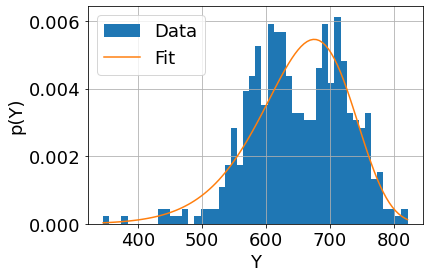

In [6]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
strength.Y.hist(bins=50, density=True, label='Data')
# fit
W=scipy.stats.weibull_min(k,loc=0, scale=x_0) 
plt.plot(x, W.pdf(x), label="Fit")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()

Il fit non è eccezionale. La cosa che ci può fare insospettire è la presenza di un doppio picco. Questo potrebbe essere dovuto al fatto che abbiamo mischiato insieme tutti i dati indipendentemente dai fattori sperimentali

## Esercizio 

Esplorare l'effetto dei vari fattori per cercare di capire quale siano i fattori che influenzano di più la distribuzione. Possiamo proecedere come seque:


<AxesSubplot:xlabel='X1', ylabel='Y'>

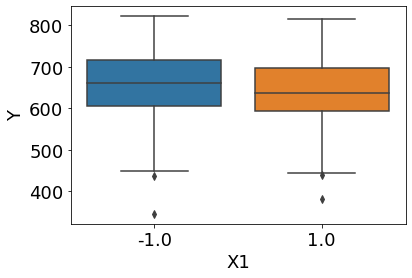

In [7]:
sns.boxplot(data=strength, x="X1", y="Y")

Da questo grafico si vede che il fattore X1 non è molto rilevante. Esplorate gli altri fattori allo stesso modo e poi vedete se il fit migliora separando i dati a seconda dei fattori.

**Svolgimento**

Creo un ciclo che a turno esploti tutti i valori possibili dei parametri. Per prima cosa creo un vettore che abbia per argomento i titoli di colonna corrispondenti ai diversi indici. Dopo di che scorro su questo vettore facendo un boxplot per ciascuno di questi parametri.

In [48]:
i=0
param = []

for col in strength.columns:
    if(i>3 and i<15):
        param.append(col)
    i=i+1
    
param

['Y', 'X1', 'X2', 'X3', 'X4', 'Trt', 'Set', 'Llab', 'Rep', 'Bat', 'Sblab']

In [49]:
strength0 = strength.loc[strength.index >= 0, [param[i] for i in range(len(param))]]

In [50]:
print(strength0)

           Y   X1   X2   X3   X4  Trt  Set  Llab  Rep  Bat  Sblab
1    608.781 -1.0 -1.0 -1.0 -1.0  1.0  1.0  0.75  1.0  1.0   0.50
2    569.670 -1.0 -1.0 -1.0 -1.0  1.0  1.0  0.75  1.0  2.0   0.75
3    689.556 -1.0 -1.0 -1.0 -1.0  1.0  1.0  0.75  1.0  1.0   0.50
4    747.541 -1.0 -1.0 -1.0 -1.0  1.0  1.0  0.75  1.0  2.0   0.75
5    618.134 -1.0 -1.0 -1.0 -1.0  1.0  1.0  0.75  1.0  1.0   0.50
..       ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...
476  698.254  1.0 -1.0 -1.0 -1.0  2.0  2.0  8.25  2.0  2.0   8.50
477  611.999  1.0 -1.0 -1.0 -1.0  2.0  2.0  8.25  2.0  1.0   8.25
478  748.130  1.0 -1.0 -1.0 -1.0  2.0  2.0  8.25  2.0  2.0   8.50
479  530.680  1.0 -1.0 -1.0 -1.0  2.0  2.0  8.25  2.0  1.0   8.25
480  689.942  1.0 -1.0 -1.0 -1.0  2.0  2.0  8.25  2.0  2.0   8.50

[480 rows x 11 columns]


In [51]:
strength0.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'Trt', 'Set', 'Llab', 'Rep', 'Bat',
       'Sblab'],
      dtype='object')

Voglio generare una copia del dataset contente per solo le colonne che 
ho selezionato sopra.

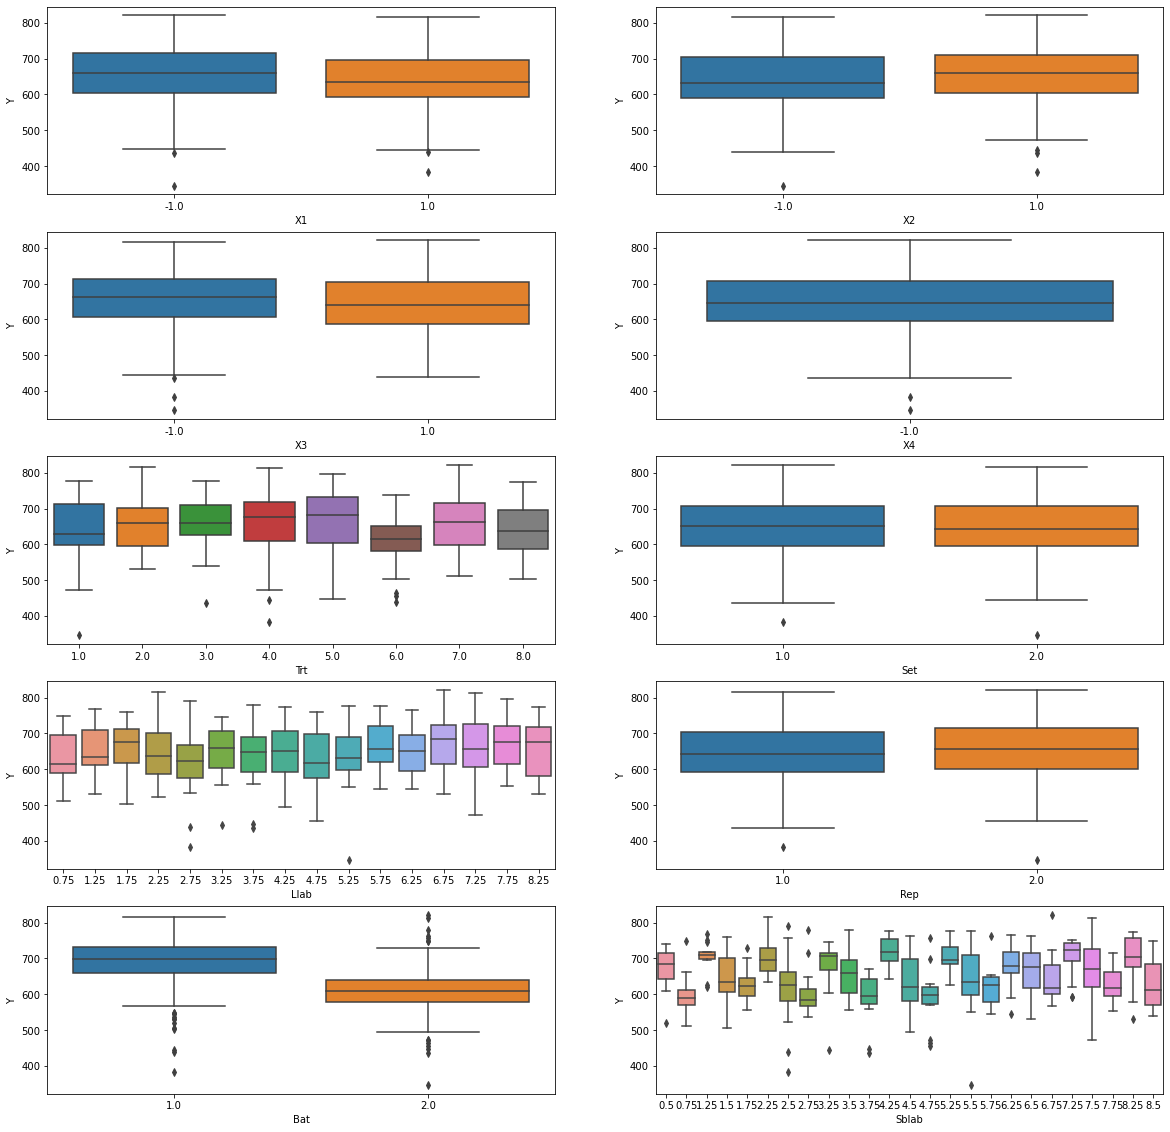

In [76]:
fig, axs = plt.subplots(5, 2, figsize=(34, 20), sharex=False, sharey=False,
                        tight_layout=False)

sns.boxplot(ax=axs[0][0], data=strength, x='X1', y='Y')
sns.boxplot(ax=axs[0][1], data=strength, x='X2', y='Y')
sns.boxplot(ax=axs[1][0], data=strength, x='X3', y='Y')
sns.boxplot(ax=axs[1][1], data=strength, x='X4', y='Y')
sns.boxplot(ax=axs[2][0], data=strength, x='Trt', y='Y')
sns.boxplot(ax=axs[2][1], data=strength, x='Set', y='Y')
sns.boxplot(ax=axs[3][0], data=strength, x='Llab', y='Y')
sns.boxplot(ax=axs[3][1], data=strength, x='Rep', y='Y')
sns.boxplot(ax=axs[4][0], data=strength, x='Bat', y='Y')
sns.boxplot(ax=axs[4][1], data=strength, x='Sblab', y='Y')

fig.set_figwidth(20)
fig.set_figheight(20)

**Esempio:** Separiamo i dati a seconda del fattore batch e poi fittiamo separatamente.

Effettivamente dai grafici si vede bene che poi studio nel seguito cioè che la differenza fondamentale (a cui sono dovuti i due picchi) dipende dal batch da cui è stata selezionata la barra.

In [77]:
Bat1=strength[strength.Bat==1]
Bat2=strength[strength.Bat==2]

Fittiamo i dati separatamente:

In [78]:
k1, loc, x_1=scipy.stats.weibull_min.fit(Bat1.Y, floc=0)
k2, loc, x_2=scipy.stats.weibull_min.fit(Bat2.Y, floc=0)

Plottiamo i dati separatamente

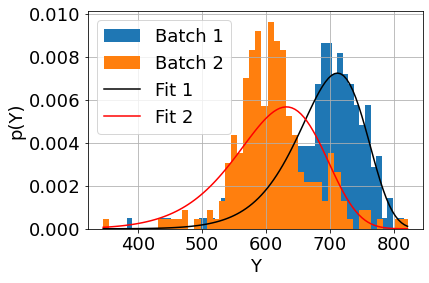

In [79]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
Bat1.Y.hist(bins=50, density=True, label='Batch 1')
Bat2.Y.hist(bins=50, density=True, label='Batch 2')
# fit
W1=scipy.stats.weibull_min(k1,loc=0, scale=x_1) 
W2=scipy.stats.weibull_min(k2,loc=0, scale=x_2)
plt.plot(x, W1.pdf(x), label="Fit 1", color="black")
plt.plot(x, W2.pdf(x), label="Fit 2", color="red")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()

Distribuzioni cumulate

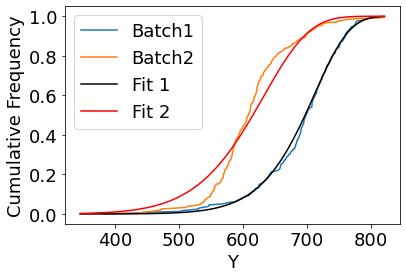

In [80]:
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
y1=np.sort(Bat1.Y)
idx1 = [ i/len(y1) for i in range(len(y1))]
y2=np.sort(Bat2.Y)
idx2 = [ i/len(y2) for i in range(len(y2))]
plt.xlabel('Y')
plt.ylabel('Cumulative Frequency')
plt.plot(y1,idx1,label="Batch1")
plt.plot(y2,idx2,label="Batch2")
plt.plot(x, W1.cdf(x), label="Fit 1", color="black")
plt.plot(x, W2.cdf(x), label="Fit 2", color="red")
plt.legend()